#Carregando as Bibliotecas

In [268]:
pip install scorecardpy


#Importação das bibliotecas



In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import scorecardpy as sc
import numpy as np

In [6]:
import warnings
warnings.filterwarnings("ignore")  # Isso irá silenciar todos os avisos

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)  # Formata os números com duas casas decimais

# Análise dos Dados

Leitura dos dados

In [224]:
metadados = pd.read_excel('/content/base-seguros.xlsx')
metadados

,Nome da coluna,Descrição
0,Flag_Renovou,Indica se o cliente renovou ou não o seguro n...
1,Idade,Idade do cliente;
2,Perfil_Risco,"A evolução do perfil de risco do cliente. ""do..."
3,Diferenca_Perfil,Diferença de perfil entre o motorista e o cli...
4,Genero,Genero do cliente.
5,Profissao,"Tipo de trabalho do cliente. ""medical"" (médic..."
6,Tempo_Apolice,Tempo da apólice.
7,Uso_Veiculo,Uso do carro.
8,Qte_Apolices,Quantidade de apólices que o cliente tem.
9,Premio_Final,Valor final do premio a ser pago pelo cliente...


O dataframe metadados identifica as variáveis de nosso dataset base

In [225]:
df = pd.read_excel('/content/base-seguros.xlsx', sheet_name='Base')
df.head()

,Flag_Renovou,Idade,Perfil_Risco,Diferenca_Perfil,Genero,Profissao,Tempo_Apolice,Uso_Veiculo,Qte_Apolices,Premio_Final,Premio_Qte_Parc,Premio_Pago_Ult,Premio_Mercado,Premio_Orig,Veic_Idade,Veic_Idade_Compra,Veic_Garagem,Veic_Potencia,Veic_Regiao
0,0,38,stable,only partner,Male,normal,1,private or freelance work,1,232.46,4 per year,232.47,221.56,243.59,9,8,private garage,225 kW,Reg7
1,1,35,stable,same,Male,normal,1,private or freelance work,1,208.53,4 per year,208.54,247.56,208.54,15,7,private garage,100 kW,Reg4
2,1,29,stable,same,Male,normal,0,private or freelance work,1,277.34,1 per year,277.35,293.32,277.35,14,6,underground garage,100 kW,Reg7
3,0,33,down,same,Female,medical,2,private or freelance work,1,239.51,4 per year,244.40,310.91,219.95,17,10,street,75 kW,Reg5
4,0,50,stable,same,Male,normal,8,unknown,1,554.54,4 per year,554.55,365.46,519.50,16,8,street,75 kW,Reg14


Nosso dataframe com os dados da empresa.

Podemos notar que os nomes das colunas estão listados na saída.

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23060 entries, 0 to 23059
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flag_Renovou       23060 non-null  int64  
 1   Idade              23060 non-null  int64  
 2   Perfil_Risco       23060 non-null  object 
 3   Diferenca_Perfil   23060 non-null  object 
 4   Genero             23060 non-null  object 
 5   Profissao          23060 non-null  object 
 6   Tempo_Apolice      23060 non-null  int64  
 7   Uso_Veiculo        23060 non-null  object 
 8   Qte_Apolices       23060 non-null  int64  
 9   Premio_Final       23060 non-null  float64
 10  Premio_Qte_Parc    23060 non-null  object 
 11  Premio_Pago_Ult    23060 non-null  float64
 12  Premio_Mercado     23060 non-null  float64
 13  Premio_Orig        23060 non-null  float64
 14  Veic_Idade         23060 non-null  int64  
 15  Veic_Idade_Compra  23060 non-null  int64  
 16  Veic_Garagem       230

In [23]:
df.shape

(23060, 19)

In [24]:
df.isnull().sum()

,0
Flag_Renovou,0
Idade,0
Perfil_Risco,0
Diferenca_Perfil,0
Genero,0
Profissao,0
Tempo_Apolice,0
Uso_Veiculo,0
Qte_Apolices,0
Premio_Final,0


O Dataset não possui nenhum tipo de dado faltante/nulo, ou seja, não é necessário realizar nenhum tipo de transformação inicial nos dados atuais.

# Renovação de Seguros

In [77]:
 # Total de Renovação

df["Flag_Renovou"].value_counts() # 0 para clientes que não renovaram o seguro


,count
Flag_Renovou,
0,20106
1,2954


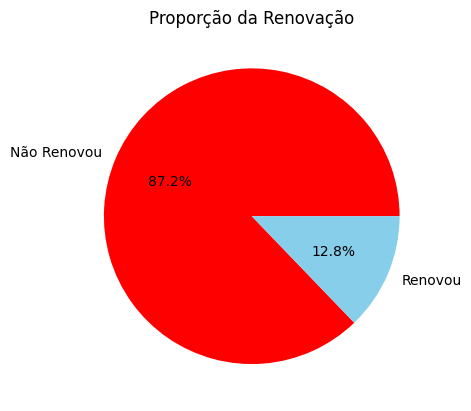

In [78]:
plt.title("Proporção da Renovação")

valores = df["Flag_Renovou"].value_counts()

plt.pie(valores, labels=["Não Renovou", "Renovou"], colors=["red", "skyblue"], autopct='%1.1f%%')
plt.show()

Foi identificado que 87.2% não renovaram o seguro,sendo assim,vamos verificar cada quesito para indentificar as causas.

# 1 Análise Univariada


## Idade

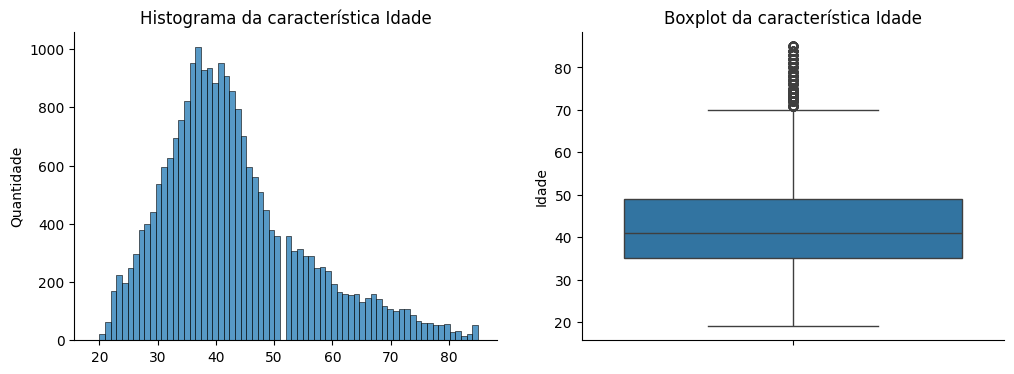

In [56]:
# Graficos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df['Idade'], ax=ax1)
ax1.set_title('Histograma da característica Idade')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Idade'], ax=ax2)
ax2.set_title('Boxplot da característica Idade')
ax2.set_xlabel('')
ax2.set_ylabel('Idade')

sns.despine()
plt.show()

In [47]:
df['Idade'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Idade,23060.00,43.05,12.35,19.00,35.00,41.00,49.00,85.00


In [45]:
# Total de Clientes por grupo

grupos = [18, 28, 38, 48, 85]

df["idade_agrupada"] = pd.cut(df["Idade"], grupos)

freq_table = pd.crosstab(df['idade_agrupada'], columns='count')
freq_table

col_0,count
idade_agrupada,
"(18, 28]",1995
"(28, 38]",7358
"(38, 48]",7692
"(48, 85]",6015


In [46]:
# Frequencia relativa em relação aos grupos

freq_table / freq_table.sum()

col_0,count
idade_agrupada,
"(18, 28]",0.09
"(28, 38]",0.32
"(38, 48]",0.33
"(48, 85]",0.26


Podemos observar que:

*  Idade tem concentraçao média por volta dos 43 anos
*  75% dos clientes apresentaram ter até 49 anos de idade.









##Perfil de Risco

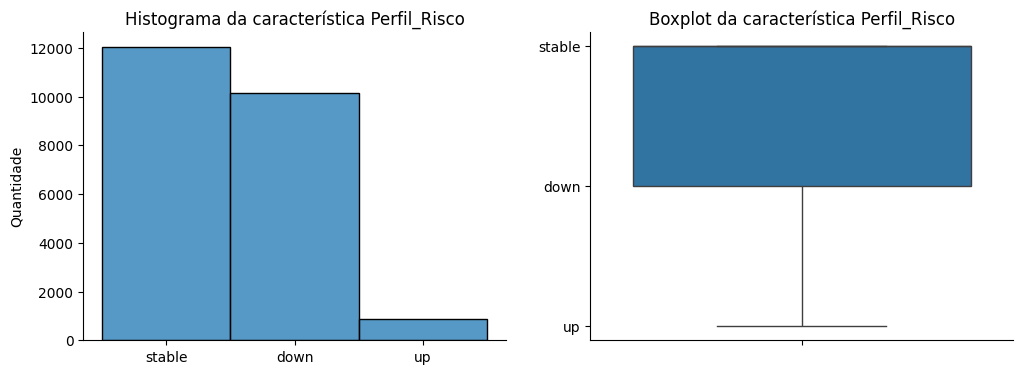

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.histplot(df['Perfil_Risco'], ax=ax1)
ax1.set_title('Histograma da característica Perfil_Risco')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Perfil_Risco'], ax=ax2)
ax2.set_title('Boxplot da característica Perfil_Risco')
ax2.set_xlabel('')
ax2.set_ylabel('Perfil_Risco')


plt.ylabel('')

sns.despine()
plt.show()

In [ ]:
df['Perfil_Risco'].describe().to_frame().T

,count,unique,top,freq
Perfil_Risco,23060,3,stable,12036


In [31]:
# Frequencia relativa a Perfil_Risco

df["Perfil_Risco"].value_counts() / sum(df["Perfil_Risco"].value_counts())

,count
Perfil_Risco,
stable,0.52
down,0.44
up,0.04


In [30]:
# Total de Perfil_Risco

df["Perfil_Risco"].value_counts()

,count
Perfil_Risco,
stable,12036
down,10155
up,869


Podemos perceber que:

*  Cerca de 96% foram de stable e down







##Diferença de Perfil

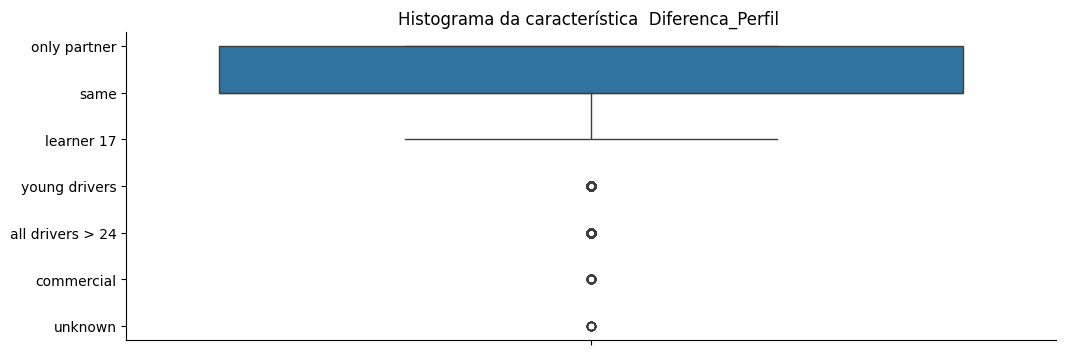

In [ ]:
fig, (ax1) = plt.subplots(1,figsize=(12,4))

sns.boxplot(df['Diferenca_Perfil'], ax=ax1)
ax1.set_title('Histograma da característica  Diferenca_Perfil ')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')


plt.ylabel('')

sns.despine()
plt.show()



In [32]:
# Frequencia relativa a Diferenca_Perfil

df["Diferenca_Perfil"].value_counts() / sum(df["Diferenca_Perfil"].value_counts())

,count
Diferenca_Perfil,
same,0.48
only partner,0.35
young drivers,0.08
all drivers > 24,0.07
learner 17,0.00
commercial,0.00
unknown,0.00


In [33]:
# Total de Diferenca_Perfil

df["Diferenca_Perfil"].value_counts()

,count
Diferenca_Perfil,
same,11155
only partner,8128
young drivers,1955
all drivers > 24,1728
learner 17,42
commercial,40
unknown,12


Podemos perceber que:


*   Cerca de 83 % são de same e only partner


# Gênero

In [35]:
# Total de Genero

df["Genero"].value_counts()

,count
Genero,
Male,14721
Female,8339


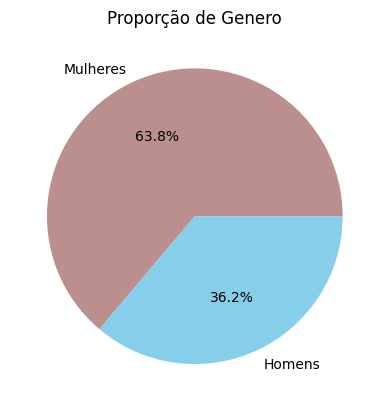

In [36]:
plt.title("Proporção de Genero")

valores = df["Genero"].value_counts()

plt.pie(valores, labels=["Mulheres", "Homens"], colors=["rosybrown", "skyblue"], autopct='%1.1f%%')
plt.show()

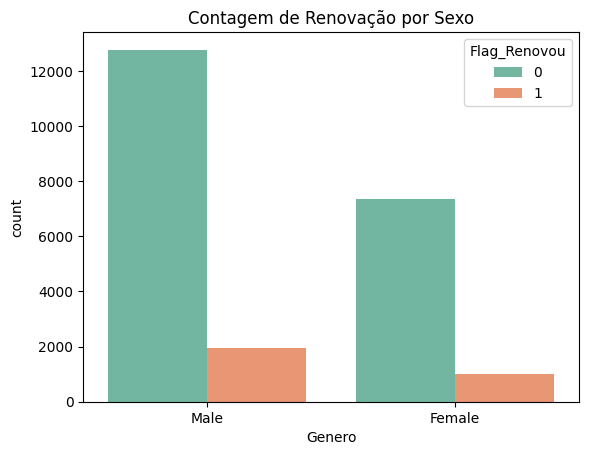

In [40]:
plt.title("Contagem de Renovação por Sexo")

sns.countplot(data=df, x="Genero", hue="Flag_Renovou", palette="Set2");

Podemos concluir que temos mais mulheres (63.8%) em nosso conjunto, porém os homens apresentam ter uma maior taxa de Não renovaçao. Irei explorar isso ao longo do projeto.



## Profissão

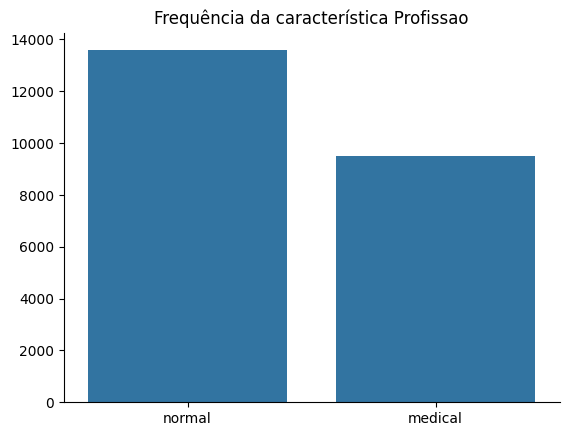

In [ ]:
sns.countplot(df, x='Profissao')
plt.title('Frequência da característica Profissao')
plt.xlabel('')
plt.ylabel('')

sns.despine()
plt.show()

In [41]:
# Frequencia relativa a Profissao

df["Profissao"].value_counts() / sum(df["Profissao"].value_counts())

,count
Profissao,
normal,0.59
medical,0.41


In [42]:
# Total de Profissao

df["Profissao"].value_counts()

,count
Profissao,
normal,13578
medical,9482


Cerca de 41% dos segurados são medicos.


#Tempo de Apólice

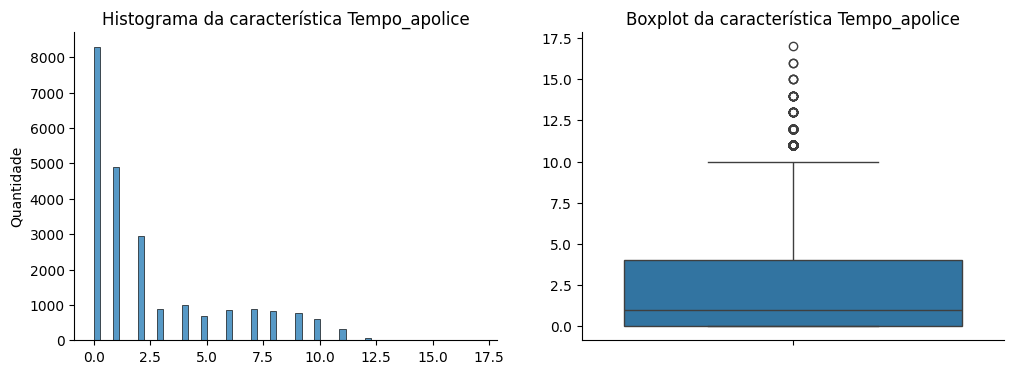

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.histplot(df['Tempo_Apolice'], ax=ax1)
ax1.set_title('Histograma da característica Tempo_apolice')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Tempo_Apolice'], ax=ax2)
ax2.set_title('Boxplot da característica Tempo_apolice')
ax2.set_xlabel('')
ax2.set_ylabel('Tempo_apolice')


plt.ylabel('')

sns.despine()
plt.show()

In [ ]:
df['Tempo_Apolice'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Tempo_Apolice,23060.00,2.44,3.10,0.00,0.00,1.00,4.00,17.00


In [60]:
# Total de Tempo_Apolice por grupo

grupos = [0, 3, 5, 7,9,17]

df["Tempo_Apolice_agrupada"] = pd.cut(df["Tempo_Apolice"], grupos)

freq_table = pd.crosstab(df['Tempo_Apolice_agrupada'], columns='count')
freq_table

col_0,count
Tempo_Apolice_agrupada,
"(0, 3]",8745
"(3, 5]",1683
"(5, 7]",1757
"(7, 9]",1579
"(9, 17]",1005


In [61]:
# Frequencia relativa em relação aos grupos

freq_table / freq_table.sum()

col_0,count
Tempo_Apolice_agrupada,
"(0, 3]",0.59
"(3, 5]",0.11
"(5, 7]",0.12
"(7, 9]",0.11
"(9, 17]",0.07


Cerca de 60 % das apolices tem ate 2 anos.

# Uso do Veiculo

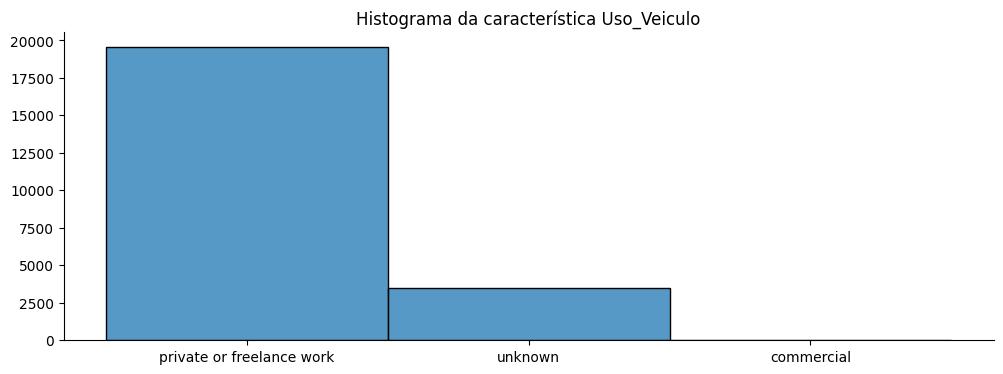

In [ ]:
fig, (ax1) = plt.subplots(1,figsize=(12,4))

sns.histplot(df['Uso_Veiculo'], ax=ax1)
ax1.set_title('Histograma da característica Uso_Veiculo')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')




plt.ylabel('')

sns.despine()
plt.show()

In [52]:
# Total de Uso_Veiculo

df["Uso_Veiculo"].value_counts()

,count
Uso_Veiculo,
private or freelance work,19567
unknown,3483
commercial,10


In [53]:
# Frequencia relativa a Uso_Veiculo

df["Uso_Veiculo"].value_counts() / sum(df["Uso_Veiculo"].value_counts())

,count
Uso_Veiculo,
private or freelance work,0.85
unknown,0.15
commercial,0.00


Cerca de 85 % do uso dos veiculos é privado ou trabalho free lance.

# Qte_Apólices

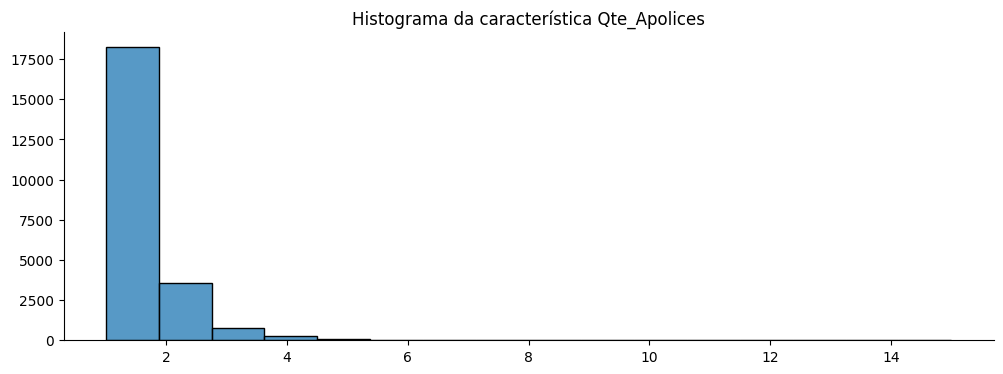

In [ ]:
fig, (ax1) = plt.subplots(1,figsize=(12,4))

sns.histplot(df['Qte_Apolices'], ax=ax1)
ax1.set_title('Histograma da característica Qte_Apolices')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')




plt.ylabel('')

sns.despine()
plt.show()

In [67]:
(round(df['Qte_Apolices'].value_counts(normalize=True),4)*100).to_frame().T

Qte_Apolices,1,2,3,4,5,6,7,10,8,9,15,11,13,12,14
proportion,79.18,15.36,3.44,1.17,0.38,0.17,0.13,0.05,0.04,0.03,0.03,0.02,0.01,0.00,0.00


In [64]:
# Total de Qte_Apolices por grupo

grupos = [1, 3, 5, 7,9,15]

df["Qte_Apolices_agrupada"] = pd.cut(df["Qte_Apolices"], grupos)

freq_table = pd.crosstab(df['Qte_Apolices_agrupada'], columns='count')
freq_table

col_0,count
Qte_Apolices_agrupada,
"(1, 3]",4334
"(3, 5]",357
"(5, 7]",70
"(7, 9]",15
"(9, 15]",25


In [65]:
df['Qte_Apolices'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Qte_Apolices,23060.00,1.31,0.79,1.00,1.00,1.00,1.00,15.00


In [66]:
# Frequencia relativa em relação aos grupos

freq_table / freq_table.sum()

col_0,count
Qte_Apolices_agrupada,
"(1, 3]",0.90
"(3, 5]",0.07
"(5, 7]",0.01
"(7, 9]",0.00
"(9, 15]",0.01


Cerca de 90 % dos segurados tem ate 2 apolices

# Prêmio Final

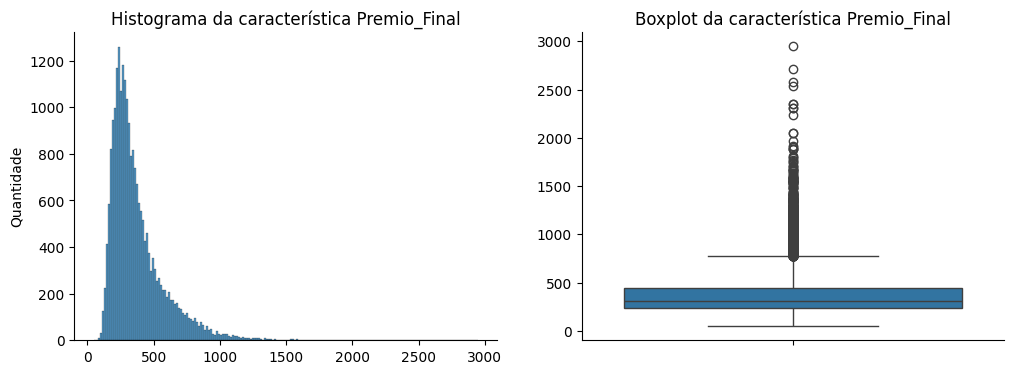

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.histplot(df['Premio_Final'], ax=ax1)
ax1.set_title('Histograma da característica Premio_Final')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Premio_Final'], ax=ax2)
ax2.set_title('Boxplot da característica Premio_Final')
ax2.set_xlabel('')
ax2.set_ylabel('Premio_Final')


plt.ylabel('')

sns.despine()
plt.show()

In [81]:
df['Premio_Final'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Premio_Final,23060.00,374.12,212.90,46.55,232.84,312.25,448.37,2948.05


In [ ]:
(round(df['Premio_Final'].value_counts(normalize=True),4)*100).to_frame().T

Premio_Final,176.54,218.71,155.90,191.90,196.79,234.79,297.50,232.61,222.86,212.64,...,219.54,381.72,362.31,719.47,148.42,481.06,607.42,360.65,391.71,615.19
proportion,0.07,0.07,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [122]:
# Total de Premio_Final por grupo

grupos = [176,219,240, 280,480,616]

df["Premio_Final_agrupada"] = pd.cut(df["Premio_Final"], grupos)

freq_table = pd.crosstab(df['Premio_Final_agrupada'], columns='count')
freq_table

col_0,count
Premio_Final_agrupada,
"(176, 219]",2814
"(219, 240]",1720
"(240, 280]",2983
"(280, 480]",8723
"(480, 616]",2286


In [105]:
# Frequencia relativa em relação aos grupos

freq_table / freq_table.sum()

col_0,count
Premio_Final_agrupada,
"(176, 215]",0.13
"(215, 293]",0.32
"(293, 381]",0.25
"(381, 480]",0.16
"(480, 616]",0.12


O Prêmio final médio a ser pago pelos segurados é 374.12

#Premio_Qte_Parc

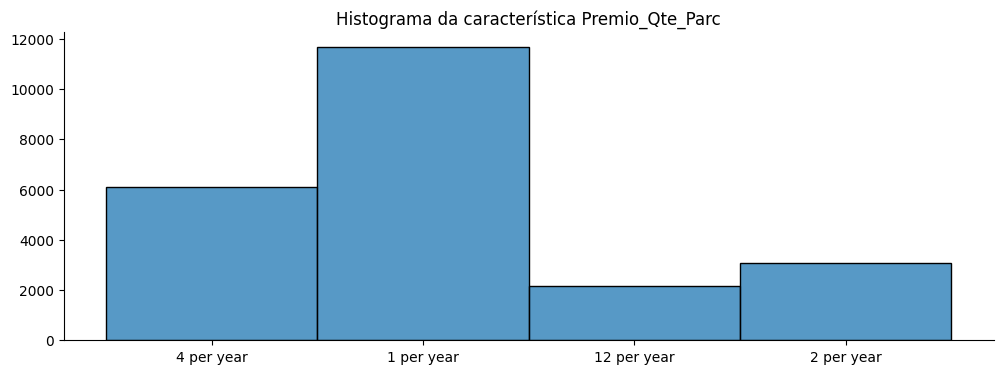

In [124]:
fig, (ax1) = plt.subplots(1,figsize=(12,4))

sns.histplot(df['Premio_Qte_Parc'], ax=ax1)
ax1.set_title('Histograma da característica Premio_Qte_Parc')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')




plt.ylabel('')

sns.despine()
plt.show()

In [129]:
# Frequencia relativa a Premio_Qte_Parc

df["Premio_Qte_Parc"].value_counts() / sum(df["Premio_Qte_Parc"].value_counts())

,count
Premio_Qte_Parc,
1 per year,0.51
4 per year,0.27
2 per year,0.13
12 per year,0.09


In [132]:
# Total de Premio_Qte_Parc

df["Premio_Qte_Parc"].value_counts()

,count
Premio_Qte_Parc,
1 per year,11680
4 per year,6114
2 per year,3090
12 per year,2176


Cerca de 51% do segurados tem até 1 parcela a ser paga por ano

#Premio_Pago_Ult

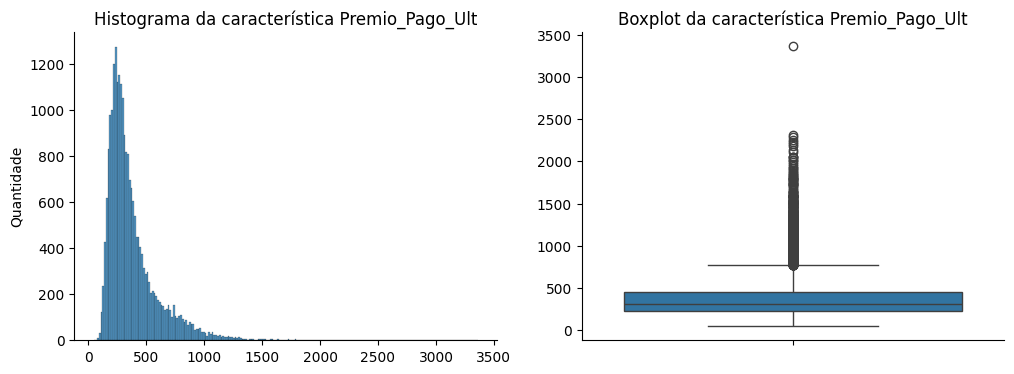

In [134]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.histplot(df['Premio_Pago_Ult'], ax=ax1)
ax1.set_title('Histograma da característica Premio_Pago_Ult')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Premio_Pago_Ult'], ax=ax2)
ax2.set_title('Boxplot da característica Premio_Pago_Ult')
ax2.set_xlabel('')
ax2.set_ylabel('Premio_Pago_Ult')


plt.ylabel('')

sns.despine()
plt.show()

In [135]:
df['Premio_Pago_Ult'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Premio_Pago_Ult,23060.00,380.51,227.94,46.56,232.63,311.00,449.60,3362.07


In [136]:
(round(df['Premio_Pago_Ult'].value_counts(normalize=True),4)*100).to_frame().T

Premio_Pago_Ult,176.55,191.91,232.63,237.01,811.04,222.88,234.80,292.40,803.42,241.49,...,309.70,135.40,241.38,859.50,907.81,310.11,359.90,534.01,306.19,714.61
proportion,0.10,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [141]:
# Total de Premio_Pago_Ult por grupo

grupos = [176,200,241,309,500,715]

df["Premio_Pago_Ult_agrupada"] = pd.cut(df["Premio_Pago_Ult"], grupos)

freq_table = pd.crosstab(df['Premio_Pago_Ult_agrupada'], columns='count')
freq_table

col_0,count
Premio_Pago_Ult_agrupada,
"(176, 200]",1518
"(200, 241]",3141
"(241, 309]",4908
"(309, 500]",7030
"(500, 715]",2608


In [142]:
# Frequencia relativa em relação aos grupos

freq_table / freq_table.sum()

col_0,count
Premio_Pago_Ult_agrupada,
"(176, 200]",0.08
"(200, 241]",0.16
"(241, 309]",0.26
"(309, 500]",0.37
"(500, 715]",0.14


O Prêmio médio da ultima parcela paga pelos segurados é 374.12.

#Premio_Mercado

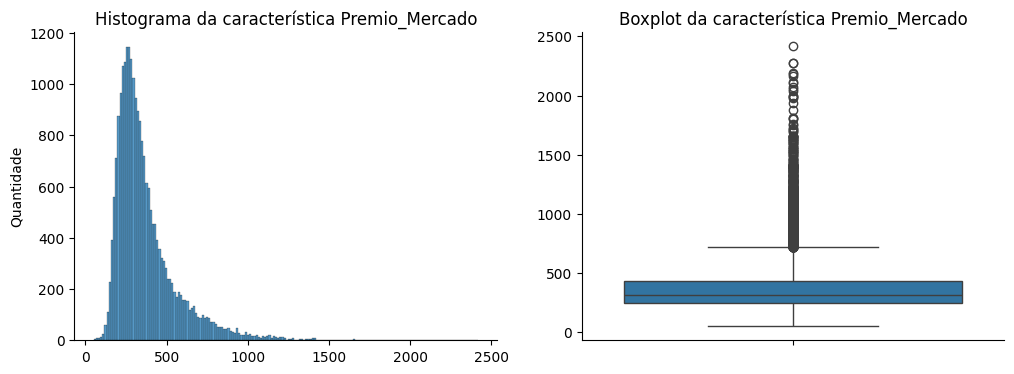

In [143]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.histplot(df['Premio_Mercado'], ax=ax1)
ax1.set_title('Histograma da característica Premio_Mercado')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Premio_Mercado'], ax=ax2)
ax2.set_title('Boxplot da característica Premio_Mercado')
ax2.set_xlabel('')
ax2.set_ylabel('Premio_Mercado')


plt.ylabel('')

sns.despine()
plt.show()

In [144]:
df['Premio_Mercado'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Premio_Mercado,23060.00,373.53,201.92,50.11,245.15,316.83,434.45,2416.84


In [145]:
(round(df['Premio_Mercado'].value_counts(normalize=True),4)*100).to_frame().T

Premio_Mercado,295.09,263.35,229.53,248.04,223.08,236.95,207.84,214.60,302.67,274.86,...,329.35,200.19,724.23,383.16,947.43,169.30,377.25,297.49,796.98,780.82
proportion,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [148]:
# Total de Premio_Mercado por grupo

grupos = [280,295,390,500,782]

df["Premio_Pago_Ult_agrupada"] = pd.cut(df["Premio_Pago_Ult"], grupos)

freq_table = pd.crosstab(df['Premio_Pago_Ult_agrupada'], columns='count')
freq_table

col_0,count
Premio_Pago_Ult_agrupada,
"(280, 295]",1067
"(295, 390]",4923
"(390, 500]",3010
"(500, 782]",3111


In [149]:
# Frequencia relativa em relação aos grupos

freq_table / freq_table.sum()

col_0,count
Premio_Pago_Ult_agrupada,
"(280, 295]",0.09
"(295, 390]",0.41
"(390, 500]",0.25
"(500, 782]",0.26



O Prêmio médio cobrado pelo mercado pelos segurados é 373.53.


#Premio_Orig

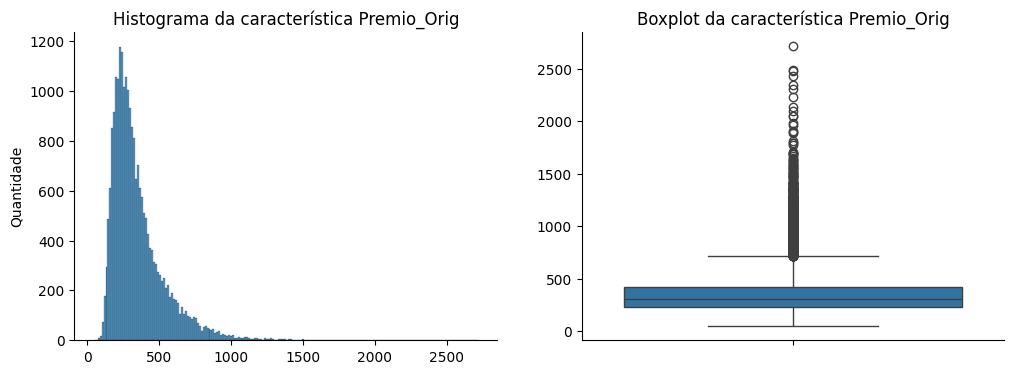

In [150]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.histplot(df['Premio_Orig'], ax=ax1)
ax1.set_title('Histograma da característica Premio_Orig')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Premio_Orig'], ax=ax2)
ax2.set_title('Boxplot da característica Premio_Orig')
ax2.set_xlabel('')
ax2.set_ylabel('Premio_Orig')


plt.ylabel('')

sns.despine()
plt.show()

In [151]:
df['Premio_Orig'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Premio_Orig,23060.00,355.88,197.14,45.55,227.10,301.45,423.56,2716.08


In [152]:
(round(df['Premio_Orig'].value_counts(normalize=True),4)*100).to_frame().T

Premio_Orig,176.55,237.67,222.01,201.06,189.60,219.95,240.31,295.16,227.10,246.06,...,202.10,192.41,135.40,647.26,756.74,539.72,380.80,259.86,219.90,492.94
proportion,0.12,0.09,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [157]:
# Total de Premio_Orig' por grupo

grupos = [176,238,300,400,483]

df["Premio_Orig_agrupada"] = pd.cut(df["Premio_Orig"], grupos)

freq_table = pd.crosstab(df["Premio_Orig_agrupada"], columns='count')
freq_table

col_0,count
Premio_Orig_agrupada,
"(176, 238]",4669
"(238, 300]",4718
"(300, 400]",5067
"(400, 483]",2316


In [158]:
# Frequencia relativa em relação aos grupos

freq_table / freq_table.sum()

col_0,count
Premio_Orig_agrupada,
"(176, 238]",0.28
"(238, 300]",0.28
"(300, 400]",0.30
"(400, 483]",0.14


O Prêmio médio cobrado pelo setor de Pricing dos segurados é 355.68

#Veic_Idade

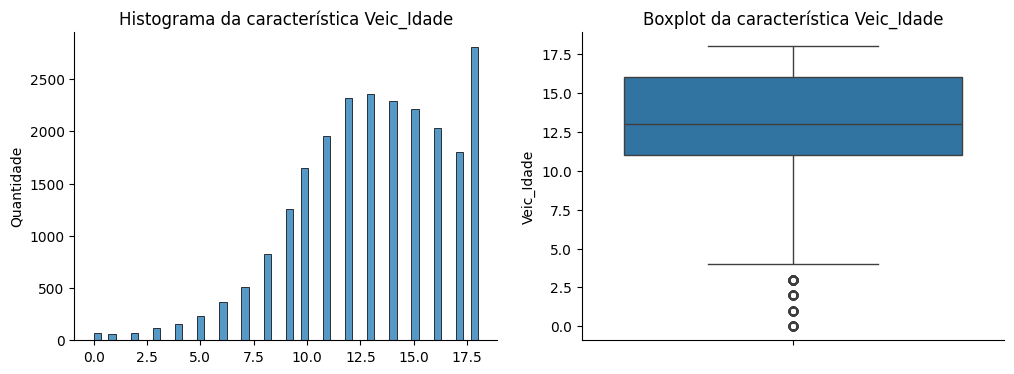

In [269]:
# Graficos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df['Veic_Idade'], ax=ax1)
ax1.set_title('Histograma da característica Veic_Idade')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Veic_Idade'], ax=ax2)
ax2.set_title('Boxplot da característica Veic_Idade')
ax2.set_xlabel('')
ax2.set_ylabel('Veic_Idade')

sns.despine()
plt.show()

In [270]:
df['Veic_Idade'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Veic_Idade,23060.00,13.06,3.59,0.00,11.00,13.00,16.00,18.00


In [271]:
# Total de Clientes por grupo

grupos = [0, 3, 6, 12, 18]

df["Veic_Idade_agrupada"] = pd.cut(df["Veic_Idade"], grupos)

freq_table = pd.crosstab(df['Veic_Idade_agrupada'], columns='count')
freq_table

col_0,count
Veic_Idade_agrupada,
"(0, 3]",245
"(3, 6]",747
"(6, 12]",8506
"(12, 18]",13494


In [272]:
# Frequencia relativa em relação aos grupos

freq_table / freq_table.sum()

col_0,count
Veic_Idade_agrupada,
"(0, 3]",0.01
"(3, 6]",0.03
"(6, 12]",0.37
"(12, 18]",0.59


Na amostra cerca de 60% dos Veiculos tem entre 12 e 18 anos.

#Veic_Idade_Compra

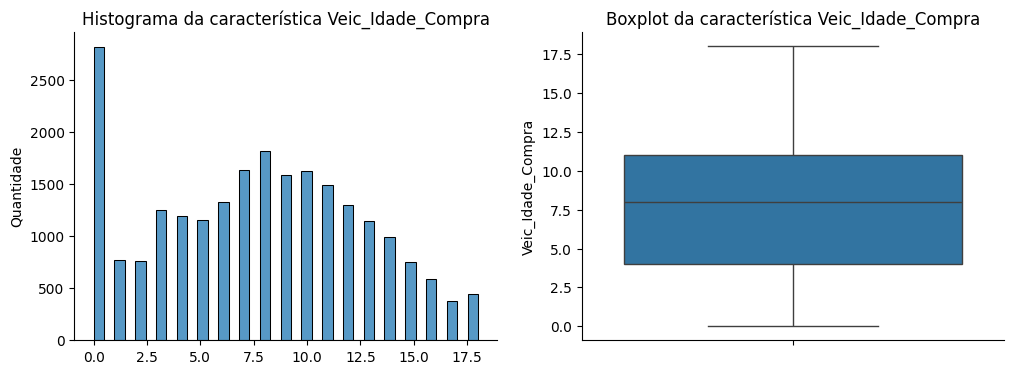

In [167]:
# Graficos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df['Veic_Idade_Compra'], ax=ax1)
ax1.set_title('Histograma da característica Veic_Idade_Compra')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')

sns.boxplot(df['Veic_Idade_Compra'], ax=ax2)
ax2.set_title('Boxplot da característica Veic_Idade_Compra')
ax2.set_xlabel('')
ax2.set_ylabel('Veic_Idade_Compra')

sns.despine()
plt.show()

In [168]:
df['Veic_Idade_Compra'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Veic_Idade_Compra,23060.00,7.68,4.96,0.00,4.00,8.00,11.00,18.00


In [169]:
# Total de Clientes por grupo

grupos = [0, 3, 6, 12, 18]

df["Veic_Idade_Compra_agrupada"] = pd.cut(df["Veic_Idade_Compra"], grupos)

freq_table = pd.crosstab(df['Veic_Idade_Compra_agrupada'], columns='count')
freq_table

col_0,count
Veic_Idade_Compra_agrupada,
"(0, 3]",2785
"(3, 6]",3686
"(6, 12]",9468
"(12, 18]",4300


In [196]:
# Frequencia relativa em relação aos grupos

freq_table / freq_table.sum()

col_0,count
Veic_Idade_Compra_agrupada,
"(0, 3]",0.14
"(3, 6]",0.18
"(6, 12]",0.47
"(12, 18]",0.21


Cerca de 50% dos carros tem idade média de até 8 anos




#Veic_Garagem

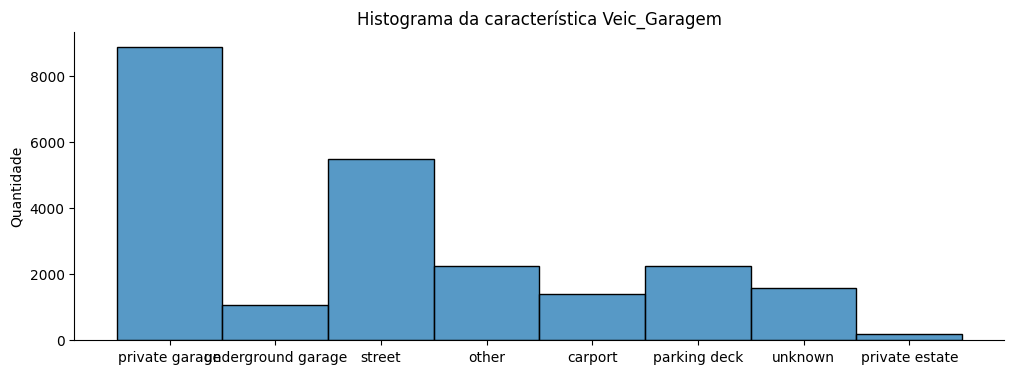

In [173]:
# Grafico

fig, (ax1 ) = plt.subplots(1,figsize=(12,4))

sns.histplot(df['Veic_Garagem'], ax=ax1)
ax1.set_title('Histograma da característica Veic_Garagem')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')


sns.despine()
plt.show()

In [185]:
(df['Veic_Garagem'].value_counts(normalize=True)*100).to_frame().T

Veic_Garagem,private garage,street,other,parking deck,unknown,carport,underground garage,private estate
proportion,38.43,23.71,9.73,9.73,6.83,6.13,4.58,0.86


In [197]:
# Total de Clientes por grupo

Veic_Garagem= df["Veic_Garagem"].value_counts().sort_index(ascending=False)
Veic_Garagem

,count
Veic_Garagem,
unknown,1575
underground garage,1056
street,5468
private garage,8863
private estate,199
parking deck,2243
other,2243
carport,1413


In [198]:
# Frequencia relativa em relação aos grupos

Veic_Garagem / Veic_Garagem.sum()

,count
Veic_Garagem,
unknown,0.07
underground garage,0.05
street,0.24
private garage,0.38
private estate,0.01
parking deck,0.10
other,0.10
carport,0.06


Cerca de 64% dos Veiculos na garagem estão classificados como stree ou private garage

#Veic_Potencia

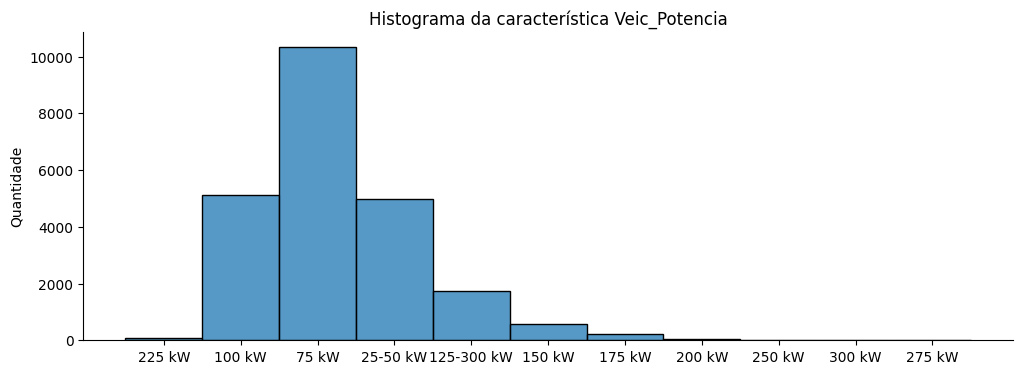

In [189]:
# Graficos

fig, (ax1) = plt.subplots(1, figsize=(12,4))

sns.histplot(df['Veic_Potencia'], ax=ax1)
ax1.set_title('Histograma da característica Veic_Potencia')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')


sns.despine()
plt.show()

In [190]:
df['Veic_Potencia'].describe().to_frame().T

,count,unique,top,freq
Veic_Potencia,23060,11,75 kW,10339


In [191]:
# Total de Clientes por grupo

Veic_Potencia= df["Veic_Potencia"].value_counts().sort_index(ascending=False)
Veic_Potencia

,count
Veic_Potencia,
75 kW,10339
300 kW,2
275 kW,4
250 kW,16
25-50 kW,4968
225 kW,77
200 kW,32
175 kW,206
150 kW,580


In [202]:
(df['Veic_Potencia'].value_counts(normalize=True)*100).to_frame().T

Veic_Potencia,75 kW,100 kW,25-50 kW,125-300 kW,150 kW,175 kW,225 kW,200 kW,250 kW,275 kW,300 kW
proportion,44.84,22.19,21.54,7.46,2.52,0.89,0.33,0.14,0.07,0.02,0.01


In [203]:
# Frequencia relativa em relação aos grupos

Veic_Potencia / Veic_Potencia.sum()

,count
Veic_Potencia,
75 kW,0.45
300 kW,0.00
275 kW,0.00
250 kW,0.00
25-50 kW,0.22
225 kW,0.00
200 kW,0.00
175 kW,0.01
150 kW,0.03


Cerca de 97% dos carros tem até 100 cavalos de potência.

#Veic_Regiao

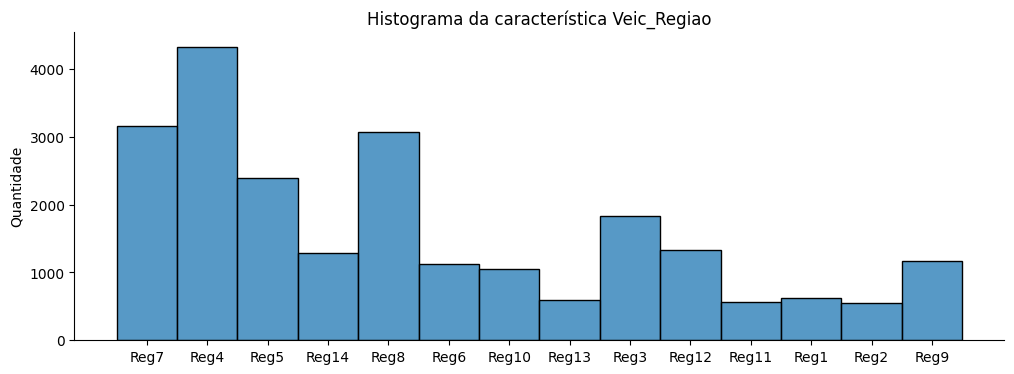

In [204]:
# Grafico

fig, (ax1 ) = plt.subplots(1,figsize=(12,4))

sns.histplot(df['Veic_Regiao'], ax=ax1)
ax1.set_title('Histograma da característica Veic_Regiao')
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')


sns.despine()
plt.show()

In [205]:
df['Veic_Regiao'].describe().to_frame().T

,count,unique,top,freq
Veic_Regiao,23060,14,Reg4,4325


In [206]:
# Total de Clientes por grupo

Veic_Regiao= df["Veic_Regiao"].value_counts().sort_index(ascending=False)
Veic_Regiao

,count
Veic_Regiao,
Reg9,1169
Reg8,3074
Reg7,3156
Reg6,1119
Reg5,2391
Reg4,4325
Reg3,1827
Reg2,556
Reg14,1289


In [207]:
# Frequencia relativa em relação aos grupos

Veic_Regiao / Veic_Regiao.sum()

,count
Veic_Regiao,
Reg9,0.05
Reg8,0.13
Reg7,0.14
Reg6,0.05
Reg5,0.10
Reg4,0.19
Reg3,0.08
Reg2,0.02
Reg14,0.06


As Regiões 14,8,7,5 e 4 somadas representam 61 % do total.

#2 Análise Bivariada

Aqui procuro entender  buscando padrões que possam explicar que sejam explicativos em relação a Não Renovação do Seguro. Para isso, será necessário usar a técnica  Análise IV


##Information Value


###“Information Value” é uma medida que ajuda a entender a importância de uma variável em relação a uma outra variável. Ele nos diz o quão bem uma variável pode prever ou explicar o resultado desejado.

Um IV alto significa que a variável é muito útil para prever o resultado.
Um IV baixo significa que a variável não é muito útil para prever o resultado.
Para calcular o “Information Value”, você compara como as diferentes categorias ou valores de uma variável estão relacionados ao resultado desejado. Se as categorias da variável têm taxas de sucesso diferentes em prever o resultado, o “Information Value” será maior.

Por exemplo, se estamos analisando a variável “Idade” de clientes e queremos prever se eles pagarão um empréstimo, o “Information Value” nos dirá o quão bem a idade dos clientes nos ajuda a fazer essa previsão. Se observarmos que os clientes mais jovens têm uma alta probabilidade de pagar o empréstimo, enquanto os mais velhos têm uma probabilidade mais baixa, a idade terá um “Information Value” alto para prever o resultado do pagamento do empréstimo.

Rule of thumb

Existe uma regrinha básica que nos permite dizer se uma variável terá um bom poder preditivo ou não através do IV:

IV < 0.02: não é útil
0.02 ≤ IV < 0.1: baixo poder preditivo
0.1 ≤ IV < 0.3: moderado poder preditivo
0.3 ≤ IV < 0.5: alto poder preditivo
IV ≥ 0.5: suspeito — em overfitting




In [228]:
y = "Flag_Renovou"

bins = sc.woebin(df, y);

[INFO] creating woe binning ...


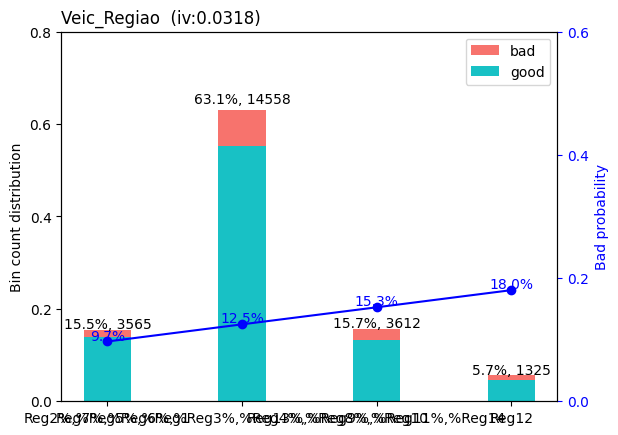

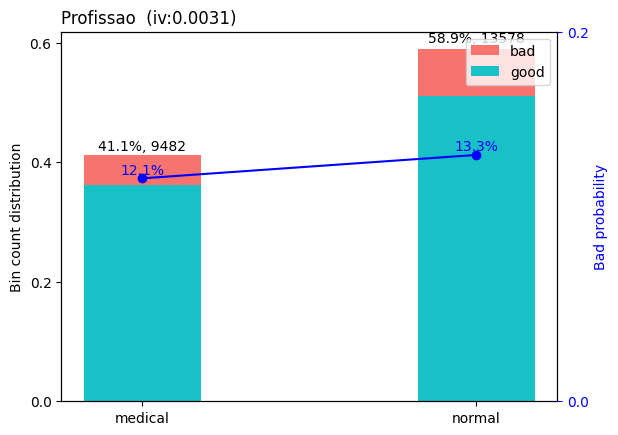

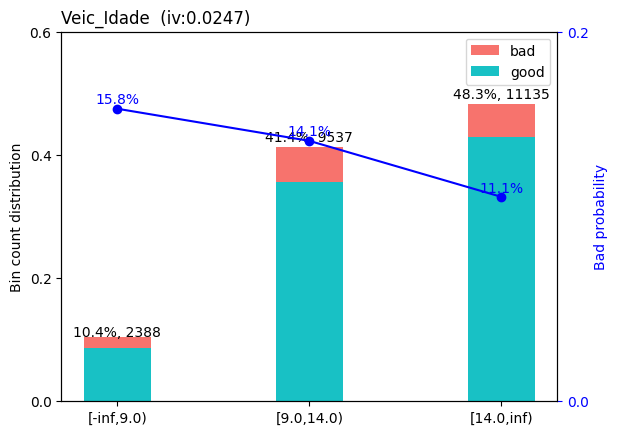

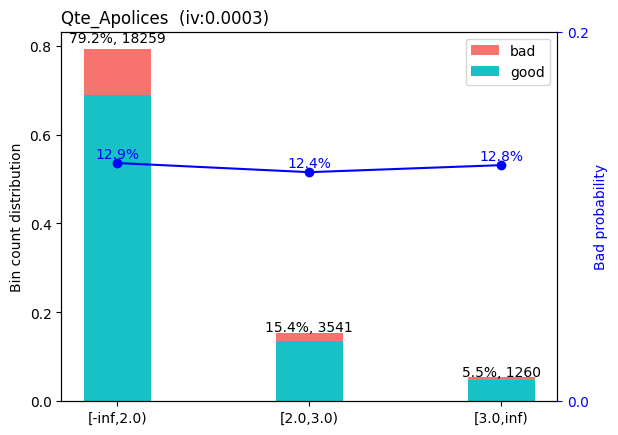

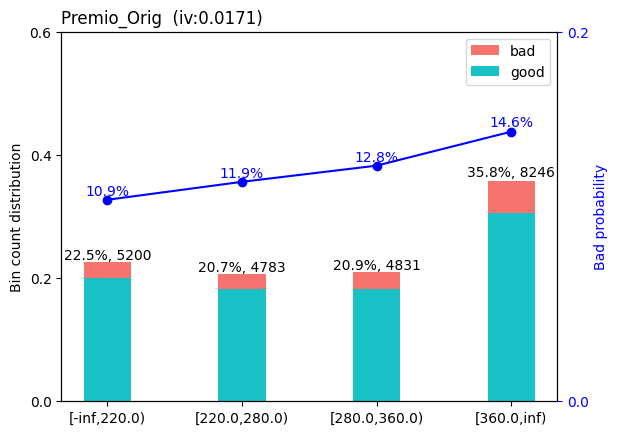

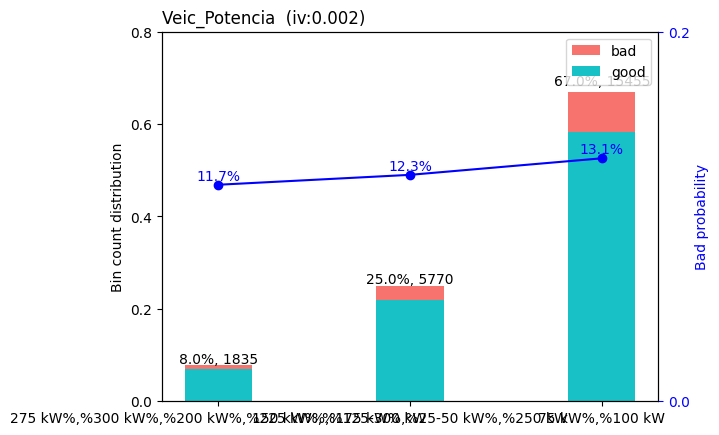

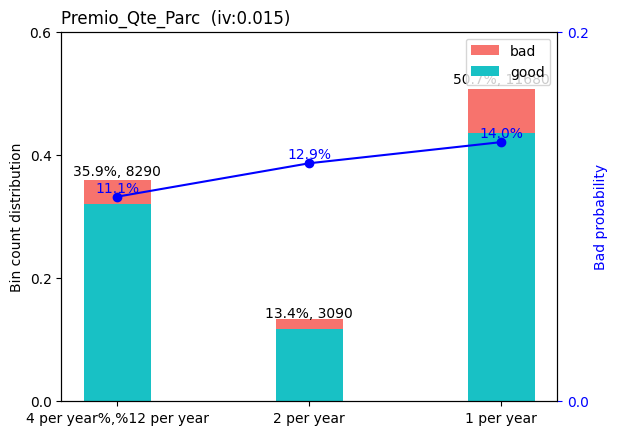

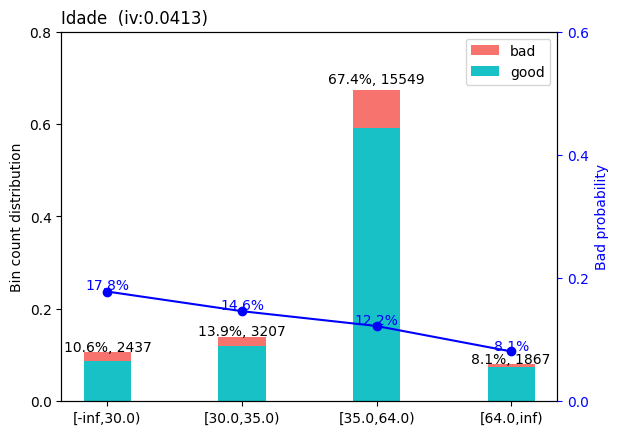

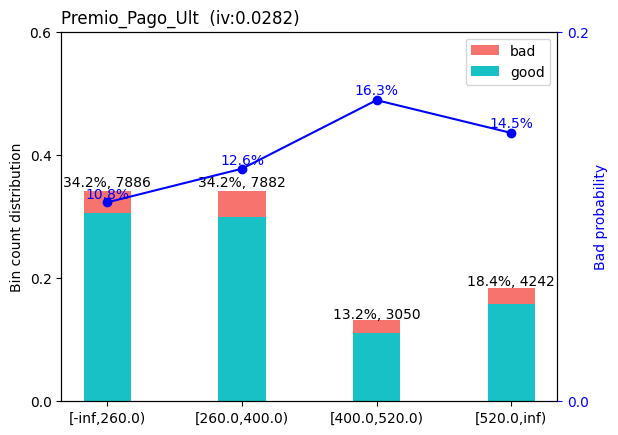

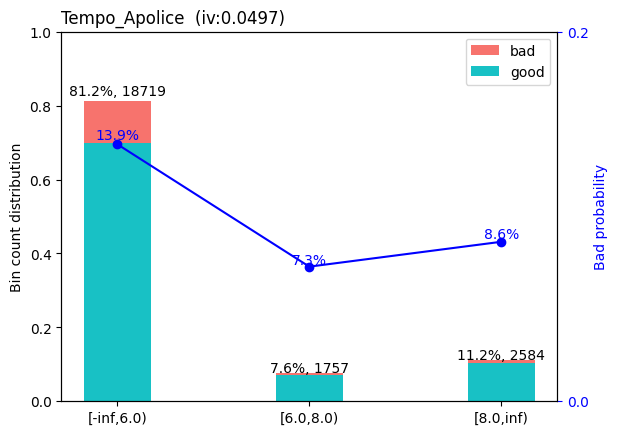

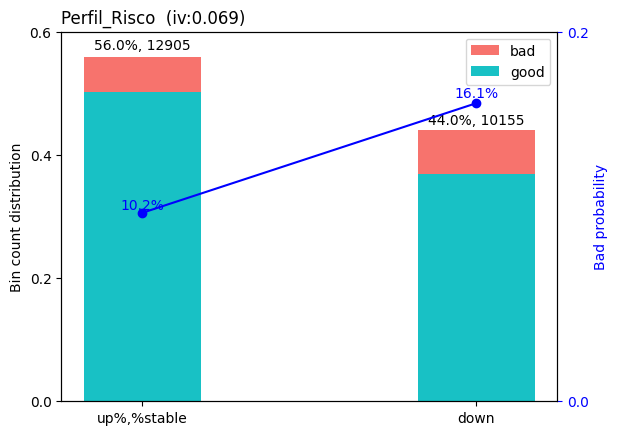

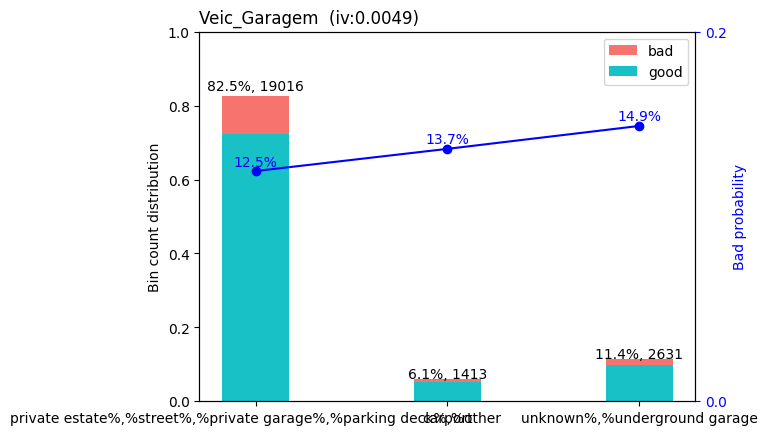

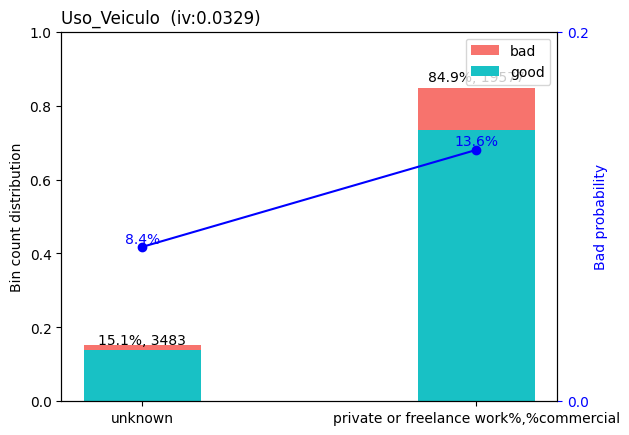

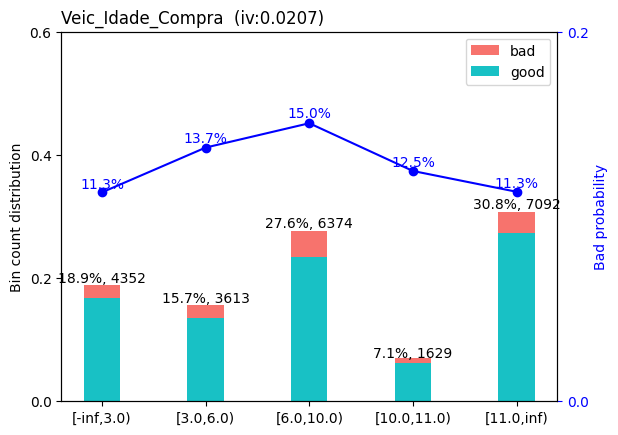

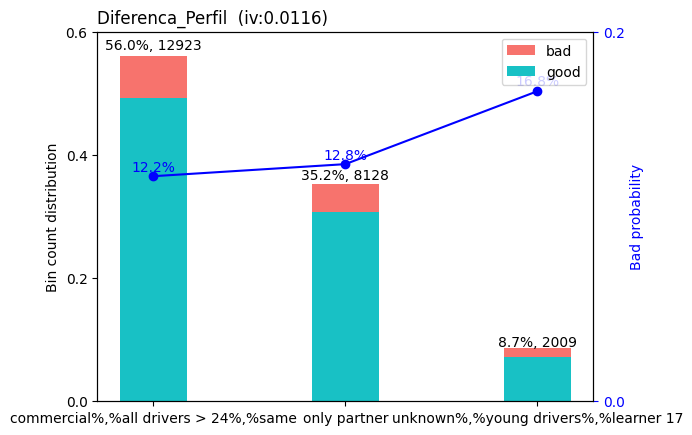

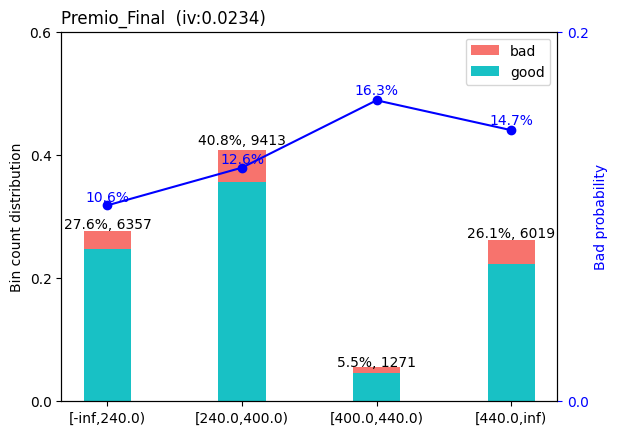

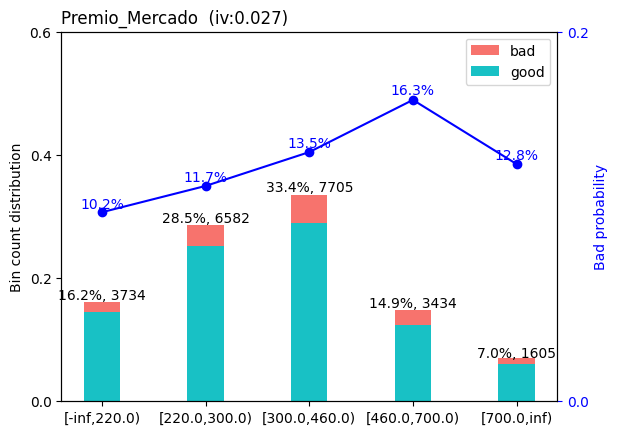

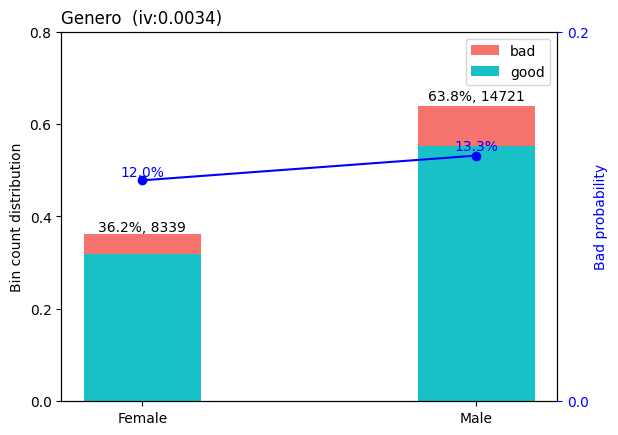

In [229]:
sc.woebin_plot(bins);

#Conclusão
Uma observação válida é que como temos uma taxa muito elevada de não renovação, irei trabalhar com um IV muito pequeno, já que a distinção entre a variável binária Flag_renovou é muito alta com 87,2% de não renovação e apenas 12,8% de renovação.



Obtemos que:


*   A variável que mais conta com poder de separação é o Perfil de Risco,(0,069),seguido por Tempo de apólice(0.0497),Idade(0.0413),Uso do Veiculo(0.0329) e Veiculo Região(0.0318)



*   Como as outras variáveis apresentam um poder de separação fraco ou muito fraco, poderiamos descarta-lás caso tivesse um alto custo para a empresa resgatariamos essas variáveis.



#Utilizando o 5W2H-Não Renovação de Seguro




**What (O quê?)**

Identificar os principais fatores que levaram à não renovação de seguros por parte de clientes com diferentes características de perfil.

**Why (Por quê?)**

A alta taxa de não renovação pode impactar negativamente a receita da empresa e indicar problemas relacionados à percepção de valor, custo ou experiência do cliente.

**Who (Quem?)**

Segurados que concentraram a maior proporção de não renovação:

Perfil de risco classificado como down (44%), stable ou up (56%).

Tempo de apólice de até 6 anos (81%).

Idade entre 35 e 64 anos (67%).

Uso de veículo classificado como commercial, private ou freelance work (85%).

Residência nas regiões 14, 8, 7, 5 e 4 (61% do total).

**Where (Onde?)**

Principalmente nas regiões 14, 8, 7, 5 e 4, que concentraram a maior proporção
de não renovação.

**When (Quando?)**

Durante o ciclo de renovação das apólices de seguro (últimos períodos analisados).

**How (Como?)**

Análise do perfil de risco dos segurados e seu impacto na decisão de renovação.
Avaliação das características relacionadas ao tempo de apólice e faixa etária.
Identificação de padrões nas regiões com maiores taxas de não renovação.
Investigação do uso do veículo como fator relevante.

**How Much (Quanto?)**

Recursos financeiros e humanos necessários para implementar ações corretivas, incluindo campanhas de retenção, melhorias nos produtos, e suporte ao cliente.

**Plano de Ação**

Revisão de políticas de preços para melhorar a atratividade para perfis mais propensos a não renovar.
Ofertas personalizadas baseadas no tempo de apólice e idade do segurado.
Campanhas regionais focadas nas áreas mais críticas (14, 8, 7, 5 e 4).
Acompanhamento proativo de clientes com uso comercial, privado ou freelance do veículo para destacar benefícios específicos.



